In [4]:
import cv2
import pytesseract
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [15]:
# PARAMETERS
path = 'img/'  # 원본이미지 경로
proc_path = 'proc_img/'  # 이진화 후 이미지 경로
sp_path = 'sp_img/'  
filename = 'image01.jpg'
sp_filename = filename.split('.')
proc_filename = sp_filename[0] + '_proc.' + sp_filename[1]
# plt.style.use('dark_background')

In [16]:
# 이미지 출력 함수
def imshow(img):
    plt.figure(figsize=(20, 10))
    plt.imshow(img, cmap='gray')
    plt.show()

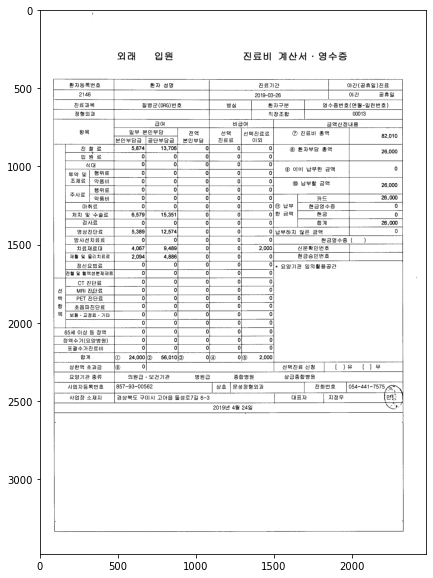

In [17]:
img = cv2.imread(path+filename, cv2.IMREAD_GRAYSCALE)
img_dim = img.shape

# 이진화
bi_thr = 190
ret, bi_img = cv2.threshold(img, bi_thr, 255, cv2.THRESH_BINARY)

cv2.imwrite(proc_path+proc_filename, bi_img)
imshow(bi_img)

* 이미지크기 확인

* 가장자리 검출

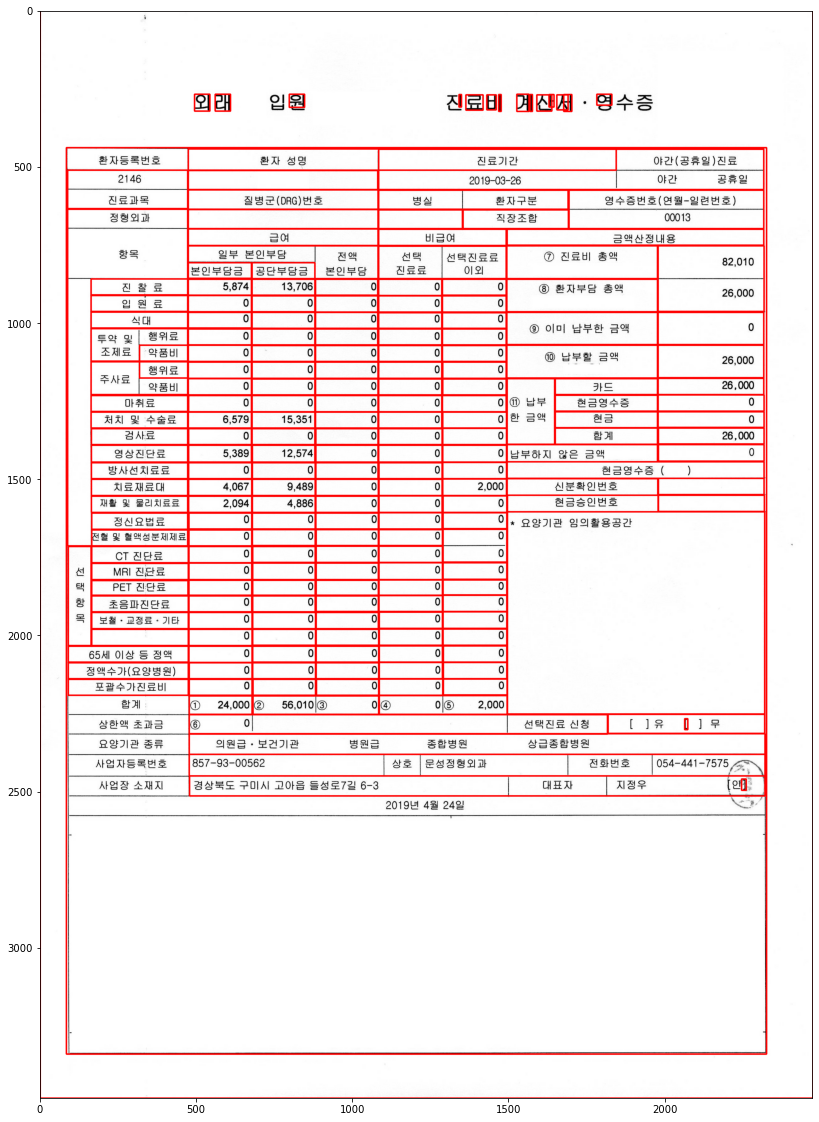

In [21]:
img = cv2.imread(path+filename, cv2.IMREAD_GRAYSCALE)
img_color = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
ret, bi_img = cv2.threshold(img, bi_thr, 255, cv2.THRESH_BINARY)


contours, hierarchy = cv2.findContours(bi_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) 

text_box_ls = list()
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt) 
    # text_box_ls.append((x, y, w, h))
    if h >= 35:
        cv2.rectangle(img_color, (x, y), (x + w, y + h ), (255, 0, 0), 4)
plt.figure(figsize=(20, 20))
plt.imshow(img_color)

---

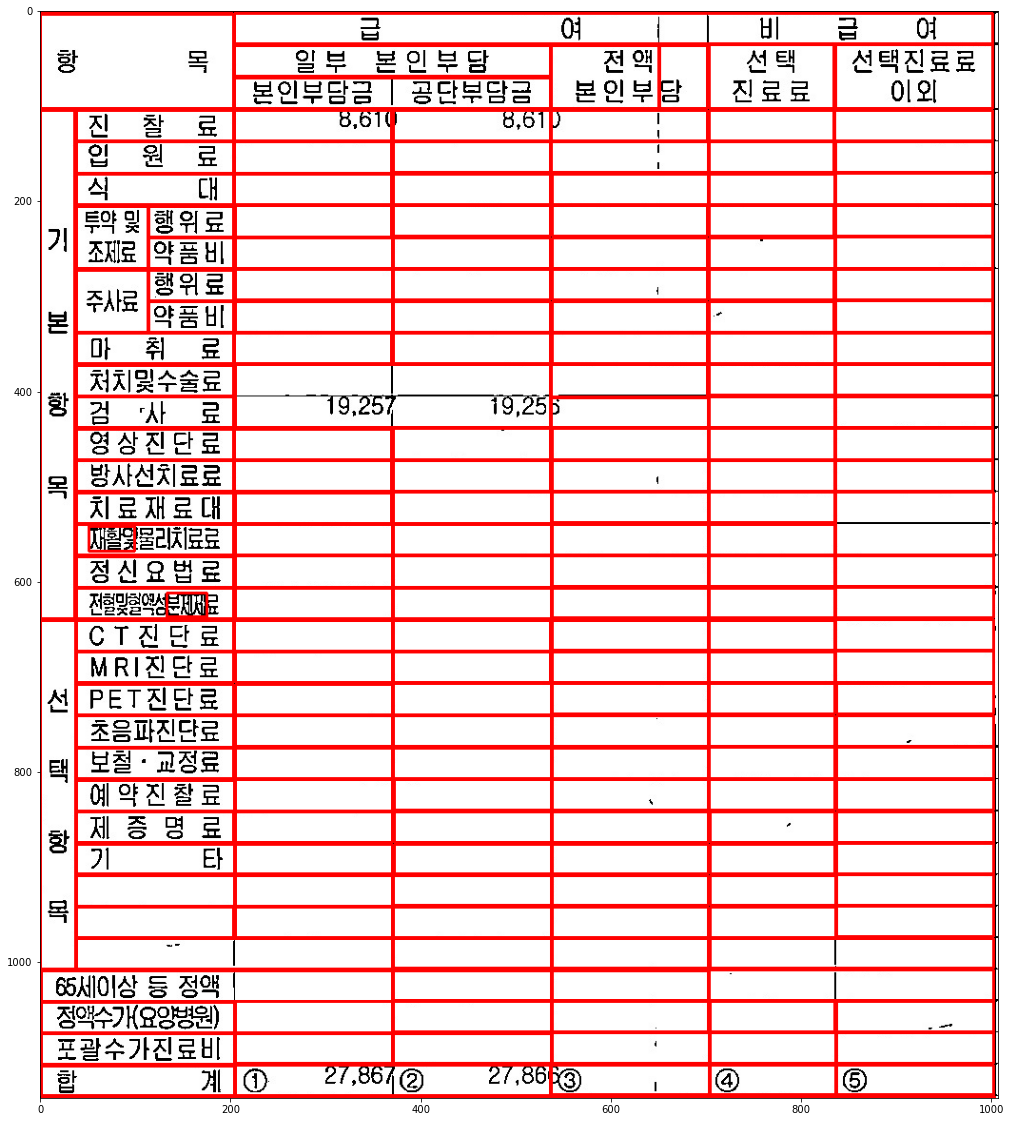

In [31]:
img = cv2.imread(path+'image04.jpg', cv2.IMREAD_GRAYSCALE)
img_color = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
ret, bi_img = cv2.threshold(img, bi_thr, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(bi_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) 

text_box_ls = list()
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt) 
    # text_box_ls.append((x, y, w, h))
    if w>=30:
        cv2.rectangle(img_color, (x, y), (x + w, y + h), (255, 0, 0), 2)
plt.figure(figsize=(20, 20))
plt.imshow(img_color)

In [22]:
for coord in text_box_ls:
    x, y, w, h = coord[0], coord[1], coord[2], coord[3]
    cv2.rectangle(img_orig, (x - mar, y - mar), (x + w + mar, y + h + mar), (255, 0, 0), 2)
    
plt.figure(figsize=(20, 10))
plt.imshow(img_orig)
plt.show()

NameError: name 'img_orig' is not defined

<Figure size 1440x720 with 0 Axes>

In [23]:
custom_oem_psm_config = r'--oem 1 --psm 7'
for n, coord in enumerate(text_box_ls):
    x, y, w, h = coord
    mar = 5
    if h >= 20:
        text_sub_img = mod_img[y-mar: y+h+mar, x-mar: x+w+mar]
        text = pytesseract.image_to_string(text_sub_img, lang = 'kor', config=custom_oem_psm_config)
        print(f'{n+1} : [{y-mar}:{y+h+mar}, {x-mar}: {x+w+mar}]--->  {text}')

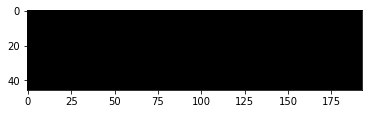